<a href="https://colab.research.google.com/github/sukjin1/ed/blob/main/gradient_descent_multiple_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경사하강법(Gradient Descent)은 최적화 알고리즘 중 하나로, 함수의 최소값을 찾는 방법입니다. 여기에는 목적 함수와 그래디언트(기울기)가 필요합니다. 아래는 경사하강법의 간단한 파이썬 코드 예시입니다. 독립변수가 2개인 경우입니다. 

0 344.0 [ -6.  -8. -10. -12.]
1 298.8953325 [ -5.612   -7.444   -9.3385 -11.1705]
2 259.7086732114975 [ -5.25034713  -6.92575725  -8.72192138 -10.3973315 ]
3 225.66354288939544 [-4.91325217 -6.4427077  -8.14721356 -9.67666909]
4 196.08534116352223 [-4.59904744 -5.99246141 -7.61153317 -9.00494714]
5 170.3879794007181 [-4.30617847 -5.57279075 -7.11222987 -8.37884215]
6 148.0622674180135 [-4.03319639 -5.18161937 -6.64683335 -7.79525634]
7 128.66582393079818 [-3.77875069 -4.81701191 -6.21304104 -7.25130226]
8 111.81431081253572 [-3.54158259 -4.47716444 -5.80870672 -6.74428857]
9 97.17381747376756 [-3.3205188  -4.16039554 -5.43182994 -6.27170669]
10 84.45424445764996 [-3.11446567 -3.86513798 -5.08054609 -5.83121839]
11 73.40355514864031 [-2.92240385 -3.58993093 -4.75311717 -5.42064424]
12 63.802781692522814 [-2.74338322 -3.33341279 -4.44792323 -5.03795279]
13 55.46168617058628 [-2.57651816 -3.09431441 -4.16345431 -4.68125057]
14 48.21499105455976 [-2.42098319 -2.87145285 -3.898303   -4.3487

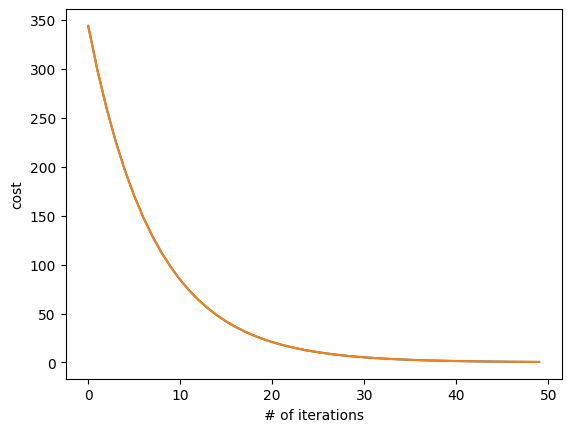

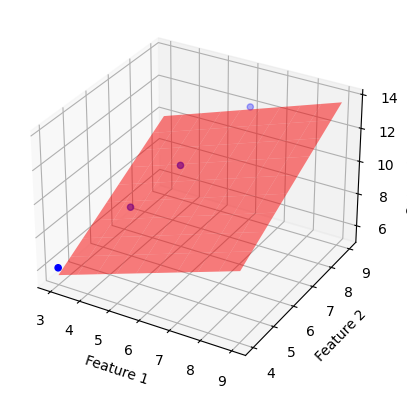

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def display_graph(x, y):
    plt.plot(x, y)
    # naming the x axis
    plt.xlabel('x - axis')
    # naming the y axis
    plt.ylabel('y - axis')

def gradient_descent(x, y, learning_rate, num_iterations):
    num_samples = x.shape[0]
    num_features = x.shape[1]
    theta = np.zeros(num_features + 1)  # Initializing weights with bias term

    # Adding a column of 1s for the bias term in the input data
    x = np.concatenate((np.ones((num_samples, 1)), x), axis=1)

    iterations = []
    cost = []
    for iteration in range(num_iterations):
        error = np.dot(x, theta) - y
        gradient = 1 / num_samples * np.dot(x.T, error)
        theta -= learning_rate * gradient
        iterations.append(iteration)
        cost.append(np.sum(error**2))
        
        print(iteration, np.sum(error**2), error )

    display_graph(iterations, cost)

    plt.plot(iterations, cost)
    # naming the x axis
    plt.xlabel('# of iterations')
    # naming the y axis
    plt.ylabel('cost')

    return theta, cost, iterations

# Data preparation
#x = np.array([[1, 3, 4], [1, 4, 6], [1, 5, 7], [1, 6, 9]])  # Input variable (3-dimensional values)
x = np.array([[3, 4], [4, 6], [5, 7], [6, 9]])  # Input variable (3-dimensional values)
y = np.array([6, 8, 10, 12])  # Output variable

# Hyperparameter settings
learning_rate = 0.001
num_iterations = 50

# Gradient descent execution
theta, cost, iterations = gradient_descent(x, y, learning_rate, num_iterations)
print("Optimal weights (theta, theta0, theta1, theta2):", theta)

#Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points
ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Data Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Output Variable')

# Generating the regression plane
x1_range = np.linspace(np.min(x[:, 0]), np.max(x[:, 1]), 10)
x2_range = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 10)
x1_values, x2_values = np.meshgrid(x1_range, x2_range)
y_values = theta[0] + theta[1] * x1_values + theta[2] * x2_values
ax.plot_surface(x1_values, x2_values, y_values, alpha=0.5, color='red', label='Regression Plane')

#ax.legend()
plt.show()
